# **PERDIDOS EN EL ESPACIO**

Este proyecto consiste en localizar el planeta en el que se encuentra la nave.

## IMPORTACIÓN DE LIBRERIAS

Primeramente, comenzamos con la importación de las distintas librerías necesarias para la realización del ejercicio. Las librerías importadas son las siguientes:</br>
- Panda: Librería dedicada a la manipulación y análisis de datos.</br>
- Numpy: Librería dedicada a funciones matemáticas, también estadísticas siendo fundamentales para la resolución del ejercicio.</br>
- Matplotlib: Librería capaz de realizar gráficos, diagramas, entre otros, es decir, es una biblioteca de visualización de datos. Para poder funcionar correctamente es necesario Numpy ya que lo utiliza para realizar distintos cálculos antes de realizar el grafico que se imprimirá. Se importa junto al módulo pyplot, que proporciona una interfaz simple para la creación y visualización de gráficos y datos.</br>
- Plotly: Librería similar a Matplotlib, cumple la misma función. Sin embargo, estos gráficos que crean son interactivos. Se importa dentro de ella express, añadiendo la posibilidad de crear gráficos de área, puntos, entre otros, necesarios para la realización de las rectas de regresión lineal.</br>
- Sklearn: Biblioteca de aprendizaje automático, permite el preprocesamiento y limpieza de datos.</br>
- Random: Libreria que permite trabajar con números aleatorios.</br>
- Seaborn: Libreria basada en Matplotlib para la visualización de datos. Permite la creación de gráficos estadísticos.</br>

In [466]:
# Importación de las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px
from faker import Faker
faker = Faker()
import sklearn as sk
print("Setup complete")

Setup complete


## CREACIÓN DE LOS PLANETAS

Los planetas tienen características similares, mismas variables, pero con distintos datos. Por ello, sería óptimo la creación de clases poniendo como variable la gravedad, id generado aleatoriamente y nombre de cada uno de ellos. Para la definición de los planetas, se ha realizado un diccionario introduciendo como clave el nombre del planeta y valor su gravedad. Finalmente mediante un bucle se han introducido en una lista todos los planetas. </br>

In [467]:
class Planeta:
    def __init__(self, nombre, g):
        self.nombre = nombre
        self.g = g
        self.id = faker.unique.random_number(digits=1) # Generar ID numérico único.
planetas_dict = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas = [] # Planetas

for nombre, g in planetas_dict.items(): # Carga de planetas
    planetas.append(Planeta(nombre, g))


print("Planetas cargados")
for i in range(len(planetas)):
    print(planetas[i].nombre, planetas[i].g, planetas[i].id)

Planetas cargados
Tierra 9.8 3
Marte 3.7 6
Jupiter 24.8 5
Saturno 9.0 9
Urano 8.7 8
Neptuno 11.0 2


Con los planetas ya generados se pasaría a la fase de la experimentación y a través de los ejercicios propuestos se descartarían algunos planetas. Aunque primero definimos las operaciones que se utilizarán para el cálculo del error y la gravedad mediante funciones y tras ello se resolverán los ejercicios propuestos.</br>

## RESOLUCIÓN DE LOS EJERCICIOS

### Planteo de las ecuaciones

El enunciado proporciona la fórmula necesaria y además especifica el error de la longitud y tiempo.</br>

In [468]:
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    t_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    dg_dL = 2 / (tiempo**2) #Derivada parcial g respecto l
    dg_dt = (-4 * longitud) / (tiempo**3) #Derivada parcial g respecto t

    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2)
    return g_calculado, g_error

Definida las distintas operaciones para el cálculo de la gravedad y el error. Nos hace falta designar una función que permita mediante ese resultado analizar en que planetas estará y descartar algunos. Para ello, se establece una función que devuelve un valor tratado con un bucle que mediante un condicional certifique si el valor de las gravedades de todos los planetas se encuentra entre la nueva gravedad calculada mas y menos su error. </br>

In [469]:
def planeta_esperado(g_calculado, g_error):
    for planeta in planetas:
        if g_calculado - g_error <= planeta.g and planeta.g <= g_calculado + g_error:
            return planeta
    return None

### Ejercicios propuestos

In [470]:
experimento_a = simulacion(1, 0.46)
print("Experimento A")
print(f"- Gravedad calculada: {round(experimento_a[0],3)} \n- Error calculado: {round(experimento_a[1],3)} ")
experimento_b = simulacion(2, 0.66)
print('Experimento B')
print(f"- Gravedad calculada: {round(experimento_b[0],3)} \n- Error calculado: {round(experimento_b[1],3)} ")

Experimento A
- Gravedad calculada: 9.452 
- Error calculado: 0.422 
Experimento B
- Gravedad calculada: 9.183 
- Error calculado: 0.282 


In [471]:
resultado_a = planeta_esperado(experimento_a[0], experimento_a[1])
resultado_b = planeta_esperado(experimento_b[0], experimento_b[1])
if resultado_a is None or resultado_b is None:
    print("No se pudo determinar el planeta en el que se encuentra la nave.")
else:
    if resultado_b == resultado_a:
        print("El planeta en el que se encuentra la nave se trata de ", experimento_a.nombre)
    else:
        planetas_probables = []
        planetas_probables.append(resultado_a.nombre)
        planetas_probables.append(resultado_b.nombre)
        print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
        for planeta in planetas_probables:
            print('  -', planeta)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


A continuación, la lista se nos ha reducido a 2 posibles planetas por lo tanto comencemos dataset.

In [472]:
df = pd.DataFrame(columns=['longitud', 'tiempo', 'gravedad', 'error', 'planeta', 'id_planeta'])
df.loc[0] = [1, 0.46, experimento_a[0], experimento_a[1], planeta_esperado(experimento_a[0], experimento_a[1]).nombre, planeta_esperado(experimento_a[0], experimento_a[1]).id]
df.loc[1] = [2, 0.66, experimento_b[0], experimento_b[1], planeta_esperado(experimento_b[0], experimento_b[1]).nombre, planeta_esperado(experimento_b[0], experimento_b[1]).id]
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1,0.46,9.451796,0.421677,Tierra,3
1,2,0.66,9.182736,0.282027,Saturno,9


El objetivo será realizar un dataset con distintos valores de longitud y tiempo y a partir de ahí calcular su error y gravedad a través de la anterior función. Tras ello, ejecutar el método anterior para averiguar en todos los posibles planetas y decidir finalmente en cual estará.</br>

## CÁLCULO DE MÁS LONGUITUDES Y TIEMPOS

Para calcular las longitudes y tiempos se realizará una recta del tipo y = mx + n, siendo la y las longitudes y la x el tiempo.</br>

Se realiza esto para no coger datos atípicos como podría ser: L = 30; t = 0'3. A continuación, se seleccionarán algunos de los infinitos puntos alrededor de la recta y se obtendrán valores para la longitud y tiempo.</br>

In [473]:
# CÁLCULO DE LA RECTA
m =(df['longitud'][1] - df['longitud'][0] )/ (df['tiempo'][1] - df['tiempo'][0])
n = df['longitud'][0] - m * df['tiempo'][0]

Mediante la funcion uniform() devuelve numeros del tipo float entre esos valores incluyendo ambos. Para el cálculo de la y, se calcula mediante la ecuación de la recta, sumándole un error debido a que en los experimentos hay cierta cantidad de variación aleatoria, por lo tanto a través de la función gauss() se aplica esta variación que puede haber.

In [474]:
x_values = [random.uniform(0.46, 0.66) for _ in range(250)]
y_values = [m*x + n + random.gauss(0, 0.05) for x in x_values] # y = mx + n + error

df_puntos = pd.DataFrame({'tiempo': x_values, 'longitud': y_values})
df_puntos = df_puntos[(df_puntos['tiempo'] >= 0.46) & (df_puntos['tiempo'] <= 0.66)].reset_index(drop=True)


df = pd.concat([df, df_puntos], ignore_index=True) # JUNTAMOS LOS DATAFRAMES

df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,3.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.482251,0.573848,NaN,NaN,NaN,NaN
3,1.725541,0.621152,NaN,NaN,NaN,NaN
4,1.520975,0.567302,NaN,NaN,NaN,NaN


In [475]:
df.head(100)

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,3.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.482251,0.573848,NaN,NaN,NaN,NaN
3,1.725541,0.621152,NaN,NaN,NaN,NaN
4,1.520975,0.567302,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,1.532756,0.559112,NaN,NaN,NaN,NaN
96,1.842394,0.639374,NaN,NaN,NaN,NaN
97,1.921268,0.643112,NaN,NaN,NaN,NaN
98,0.953537,0.461890,NaN,NaN,NaN,NaN


In [476]:
df = df.drop_duplicates() #por si hubiese duplicados

En este caso, se realizará una gráfica con todos los datos del dataframe y serán colocado en el gráfico para comprobar que son puntos cercanos a la recta. En este caso, usaremos la libreria Matplotlib.

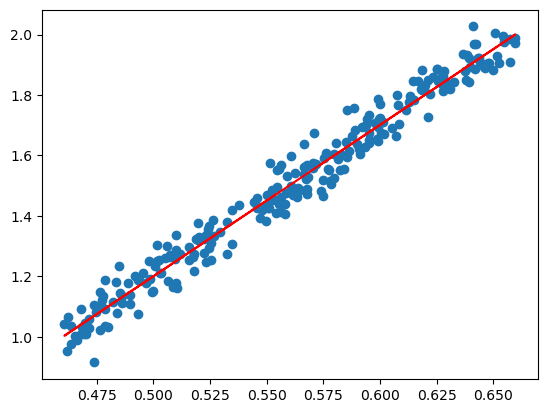

In [477]:
m, n = np.polyfit(x_values, y_values, 1) # polyfit(x, y, grado del polinomio): coeficientes del polinomio

plt.scatter(x_values, y_values)
plt.plot(x_values, m*np.array(x_values) + n, color='red')
plt.show()

In [478]:
df.dtypes # Comprobamos que los tipos de datos son correctos

longitud      float64
tiempo        float64
gravedad      float64
error         float64
planeta        object
id_planeta    float64
dtype: object

In [479]:
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,3.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.482251,0.573848,NaN,NaN,NaN,NaN
3,1.725541,0.621152,NaN,NaN,NaN,NaN
4,1.520975,0.567302,NaN,NaN,NaN,NaN


## CÁCULO DE LA GRAVEDAD

Con los tiempos y longitudes ya podemos empezar a determinar el error y la gravedad. Para ello, crearemos dos listas en las cuales mediante un bucle se irán añadiendo los cálculos del error y gravedad a sus correspondientes listas. Tras ello, serán añadidas al dataframe creado anteriormente. </br>

In [480]:
g_calculado = []
g_error = []
for i in range(len(df)):
    g = simulacion(df['longitud'][i], df['tiempo'][i])
    g_calculado.append(g[0])
    g_error.append(g[1])
df['gravedad'] = g_calculado
df['error'] = g_error


A continuacuón, imprimimos las primeras columnas del dataframe para verlo y posteriormente crearemos un csv para guardarlo.</br>

In [481]:
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,3.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.482251,0.573848,9.002403,0.319580,NaN,NaN
3,1.725541,0.621152,8.944555,0.292626,NaN,NaN
4,1.520975,0.567302,9.452007,0.338972,NaN,NaN


In [482]:
df.to_csv('data/datos_faker.csv', index=False)

Tras todo lo realizado, ya se han obtenido todos los datos necesarios para calcular la gravedad y poder finalmente usar la función 'planetas_esperado' para obtener el planeta. Pero antes de eso, se realizará una copia del dataframe anterior para no modificarlo.</br>

In [483]:
df_1 = df.copy()

## POSIBLE PLANETA

Mediante un bucle ejecutamos la función definida al principio para averiguar el planeta en el que se encuentre. En el caso en el que no sea de ningún planeta, se devolverá un valor vacío que posteriormente sería eliminado.</br>

In [484]:
for i in range(len(df_1)):
    planeta = planeta_esperado(df_1['gravedad'][i], df_1['error'][i])
    if planeta is None:
        df_1.loc[i, 'planeta'] = None
        df_1.loc[i, 'id_planeta'] = None
    else:
        df_1.loc[i, 'planeta'] = planeta.nombre
        df_1.loc[i, 'id_planeta'] = planeta.id


In [485]:
df_1.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,3.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.482251,0.573848,9.002403,0.319580,Saturno,9.0
3,1.725541,0.621152,8.944555,0.292626,Saturno,9.0
4,1.520975,0.567302,9.452007,0.338972,None,NaN


In [486]:
df_1.describe()

,longitud,tiempo,gravedad,error,id_planeta
count,252.000000,252.000000,252.000000,252.000000,209.000000
mean,1.497872,0.559500,9.492569,0.349472,5.497608
std,0.286700,0.056410,0.348381,0.041707,2.964736
min,0.914819,0.460000,8.145513,0.272424,3.000000
25%,1.262943,0.510022,9.229725,0.315883,3.000000
50%,1.491733,0.561912,9.473133,0.344826,3.000000
75%,1.727923,0.601473,9.731185,0.385587,9.000000
max,2.026590,0.660000,10.511649,0.442059,9.000000


Finalmente, con el dataframe creado ejecutamos el siguiente comando para eliminar los valores que estén 'vacios' en la columna planeta.</br>

In [487]:
df_1.isnull().sum() # Eliminar las filas con valores NaN

longitud       0
tiempo         0
gravedad       0
error          0
planeta       43
id_planeta    43
dtype: int64

In [488]:
df_1 = df_1.dropna() # Eliminar las filas con valores NaN, en el caso de si las hubiese

In [489]:
df_1.value_counts('planeta')

planeta
Tierra     122
Saturno     87
dtype: int64

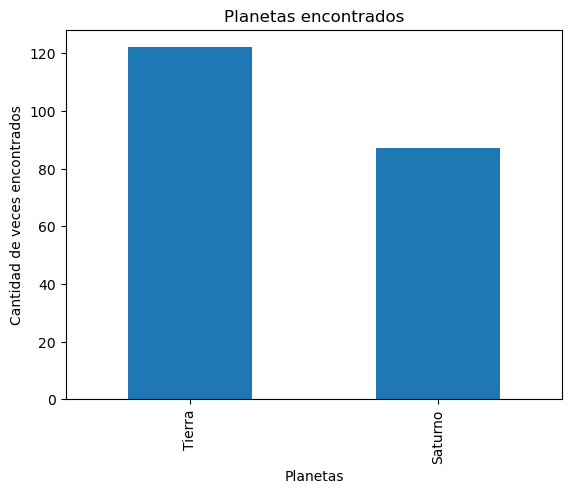

In [490]:
df_1['planeta'].value_counts().plot(kind='bar')

plt.title('Planetas encontrados')
plt.xlabel('Planetas')
plt.ylabel('Cantidad de veces encontrados')

plt.show()

In [491]:
# Ni
freq_abs = df_1['planeta'].value_counts()

# Ni/N
freq_rel = freq_abs / len(df_1['planeta'])

# Calcular los porcentajes (opcional)
porcentajes = freq_rel * 100
for i in range(len(porcentajes)):
    print(f'{freq_abs.index[i]}: {round(porcentajes[i], 2)}%')

Tierra: 58.37%
Saturno: 41.63%


Todo indica que la Tierra es el planeta en el que se encuentran, pero por si acaso comprobemos el dataset.</br>

In [492]:
df_2 = df_1.copy()

## COMPROBACIÓN DEL DATASET

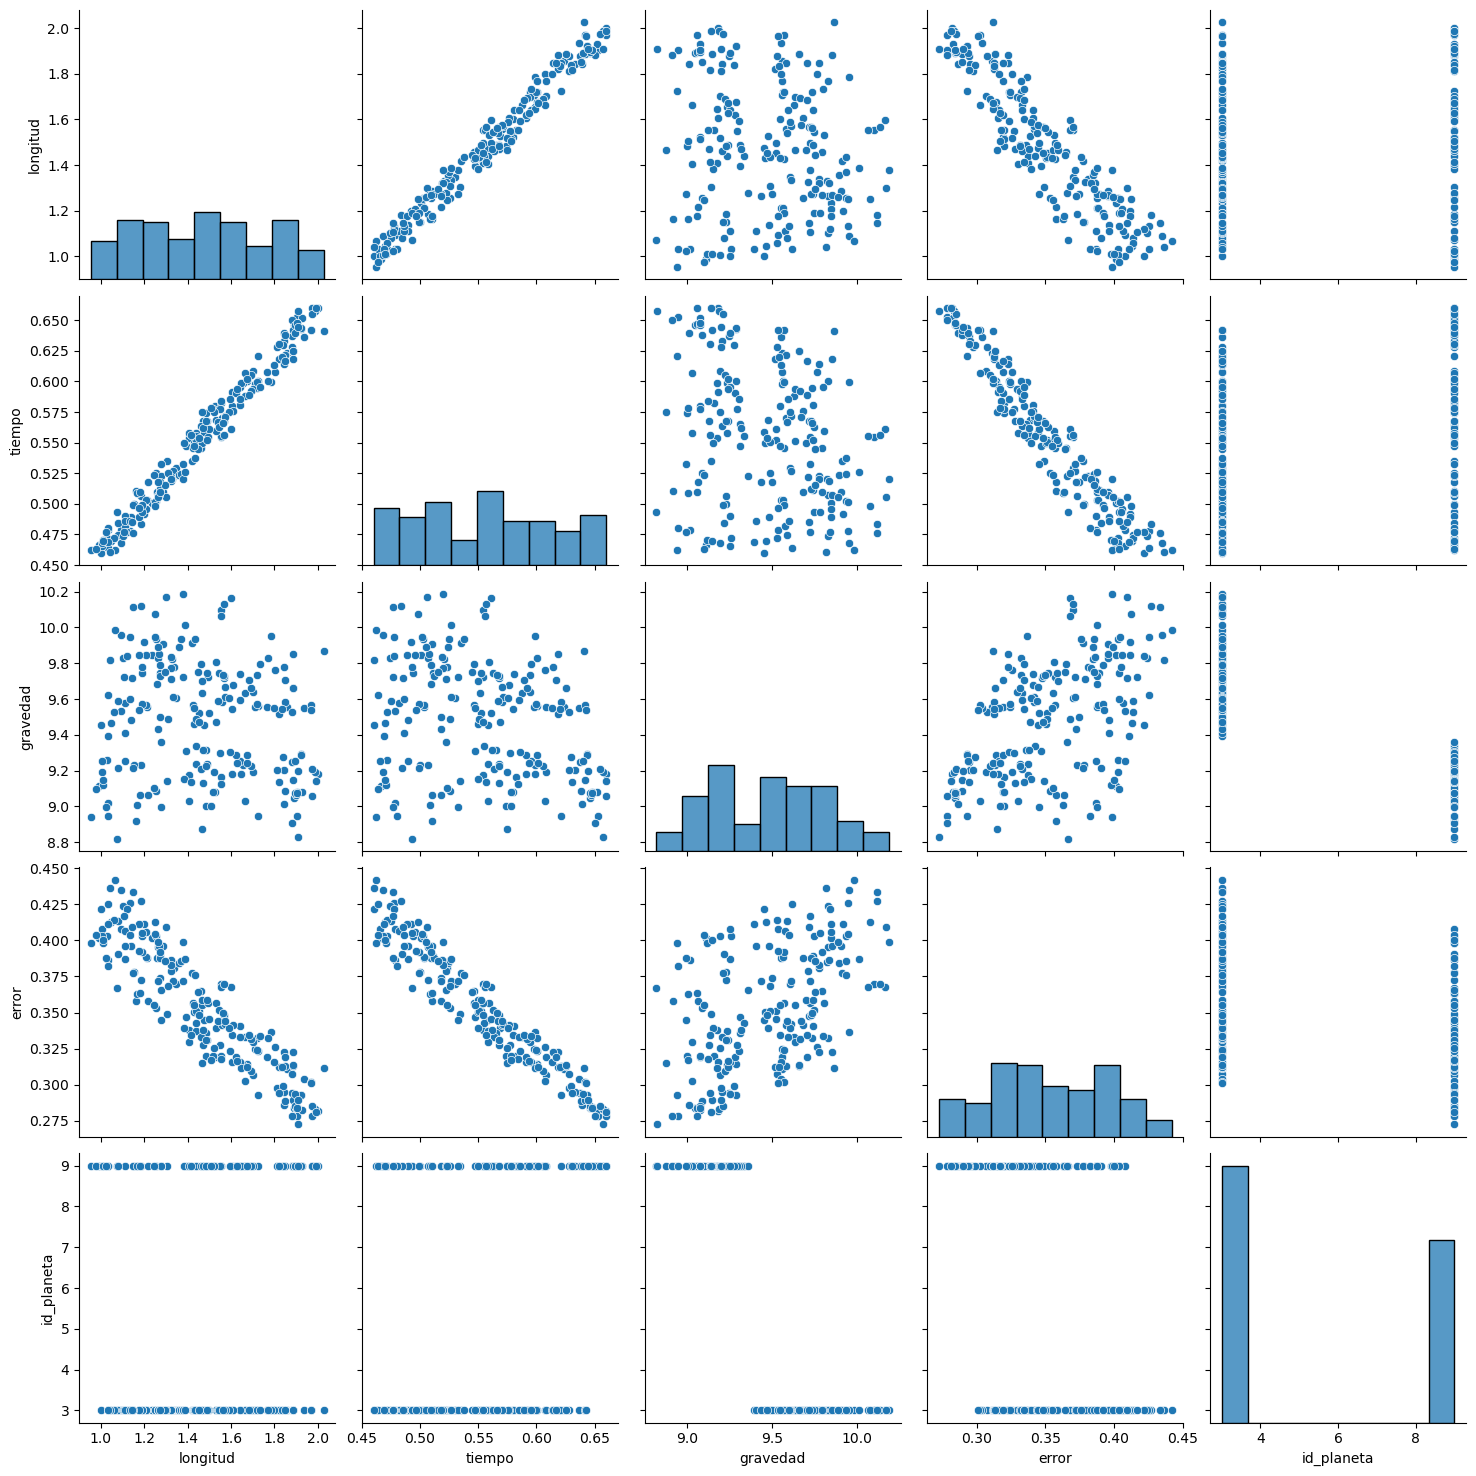

In [493]:
# Visualizamos las relaciones de cada par de variables existentes en el conjunto de datos
sns.pairplot(data=df_2, height=3)
plt.show()

### Arbol de decisión

Primeramente se definen todas las variables del modelo excepto la que se piensa que peude originar conflicto. </br>


In [494]:
x = df_2.drop('id_planeta', axis='columns')
x = x.drop('planeta', axis='columns') # No son numéricos
y = df_2['id_planeta']

Mediante esta función lo que se hace es divivir parte de los datos para entrenamiento y otro de prueba de forma aleatoria. Con est se consigue comprobar si el modelo es capaz de hacer predicciones precisas en datos nuevos.</br>

In [495]:
from sklearn.model_selection import train_test_split

x_train_adv, x_test_adv, y_train_adv, y_test_adv = train_test_split(x, y, test_size=0.2, random_state=99)

In [496]:
from sklearn.tree import DecisionTreeRegressor


arbol = DecisionTreeRegressor(max_depth=3, random_state=100)
arbol.fit(x, y)
arbol.fit(x_train_adv, y_train_adv)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [497]:
y_pred = arbol.predict(x_test_adv) 

Lo que trata de realizar es un modelo de regresión aleatoria que pueda predecir valores de una variable objetivo.</br>

Finalmente, mediante lo siguiente evaluamos la calidad del modelo de regresión generado.</br>
- MAE: Magnitud promedio de los errores en una predicción.</br>
- MAPE: Evaluar la precisión de los modelos.</br>
- MSE: Medida más adecuada para evaluar los modelos y encontrar valores atípicos.</br>
- RMQE: Raiz de MSE.</br>
- R^2: Un valor cercano a 1 indica que el modelo se ajusta bien a los datos, es decir, es capaz predecir el valor de la variable objetivo.</br>

In [498]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


El dataset si sale o 0 o 1 es perfecto, esto es debido a que ha sido generado por nosotros. Cuando un dataset es perfecto es debido a que es falso. Lo que nos indica lo obtenido es qu el modelo se ajustó a los datos y no hay error en cuanto a la predicción. Para considerar un dataset perfecto, debe de estar por debado del 20%.

In [499]:
print("R^2 de entrenamiento:", arbol.score(x_train_adv,y_train_adv))
print("R^2 de prueba (test):", arbol.score(x_test_adv,y_test_adv))

R^2 de entrenamiento: 1.0
R^2 de prueba (test): 1.0


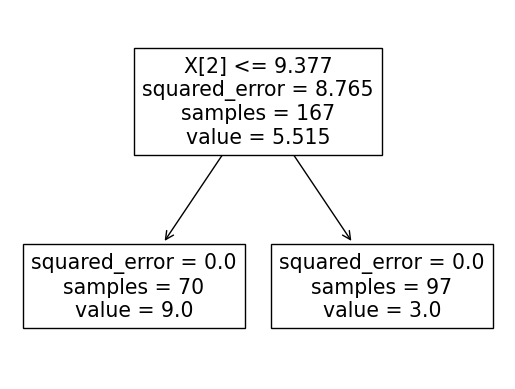

In [500]:
from sklearn import tree
tree.plot_tree(arbol)
plt.show()